# Name : Tassadit DEBIANE
# Task 2 : Prediction using Unsupervised ML

In [58]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/282.6 kB 1.3 MB/s eta 0:00:01
     -------- ---------------------------- 61.4/282.6 kB 812.7 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 819.2 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/282.6 kB 853.3 kB/s eta 0:00:01
     ------------------------------ ------- 225.3/282.6 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  276.5/282.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 282.6/282.6 kB 969.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/14.7 MB 1.7 MB/s eta 0:00:09
     ---------------------------------------- 0.1/14.7 MB 1.7 MB/s eta 0:00:09
     ---------------------------------------- 0.2/14.7 MB 1.8 MB/s eta 0:00:09
      --------------------------------------- 0.3/14.7 MB 

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.22.4 which is incompatible.


In [59]:
# Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
#read the dataset
df= pd.read_csv("Iris.csv")

#display the first few rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
#display statistical description of the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [61]:
#show the number of non-null values and the type of each column
df.info()
print(df["Species"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
3


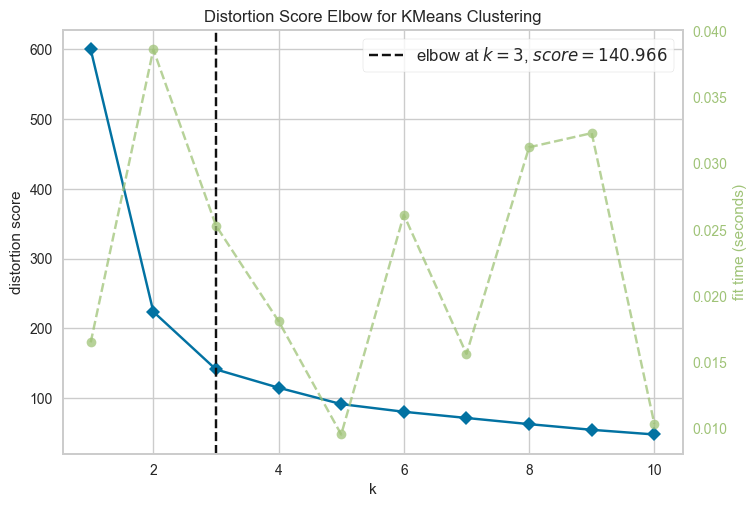

The optimal number of clusters is: 3


In [64]:
# Select the meaningful characteristics
features = df.iloc[:, 1:5].values

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Use the KElbowVisualizer
model = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(features_scaled)

# Display the elbow plot
visualizer.show()

# Get the optimal number of clusters
optimal_clusters = visualizer.elbow_value_
print(f"The optimal number of clusters is: {optimal_clusters}")




In [65]:
# Apply KMeans with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)


In [68]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


# Thank you !